In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#CNN for brain tumor detection from MRI images. This project will involve the following steps:

Setting up the environment
Importing libraries and loading data
Preprocessing the data
Building the CNN model
Compiling the model
Training the model
Evaluating the model
Making predictions
Step 1: Setting Up the Environment
Ensure you have the necessary libraries installed:

In [2]:
pip install tensorflow opencv-python matplotlib numpy


#Step 2: Importing Libraries and Loading

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# Define paths
train_dir = '/content/drive/MyDrive/Dataset/train'
test_dir = '/content/drive/MyDrive/Dataset/test'





# Step 3: Preprocessing the Data


In [8]:
# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')


Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


# Step 4: Building the CNN Model

In [9]:
# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Display the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

#Step 5: Compiling the Model


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


#Step 6: Training the Model


In [11]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
8/8 [==============================] - 75s 9s/step - loss: 0.8769 - accuracy: 0.6126 - val_loss: 0.5743 - val_accuracy: 0.6719
Epoch 2/10
8/8 [==============================] - 25s 3s/step - loss: 0.5674 - accuracy: 0.7154 - val_loss: 0.5204 - val_accuracy: 0.7549
Epoch 3/10
8/8 [==============================] - 26s 3s/step - loss: 0.5771 - accuracy: 0.7154 - val_loss: 0.5478 - val_accuracy: 0.7589
Epoch 4/10
8/8 [==============================] - 23s 3s/step - loss: 0.5912 - accuracy: 0.6917 - val_loss: 0.4852 - val_accuracy: 0.7826
Epoch 5/10
8/8 [==============================] - 25s 3s/step - loss: 0.5203 - accuracy: 0.7708 - val_loss: 0.4960 - val_accuracy: 0.7549
Epoch 6/10
8/8 [==============================] - 23s 3s/step - loss: 0.5545 - accuracy: 0.7431 - val_loss: 0.4720 - val_accuracy: 0.8103
Epoch 7/10
8/8 [==============================] - 25s 3s/step - loss: 0.4743 - accuracy: 0.7905 - val_loss: 0.4169 - val_accuracy: 0.8261
Epoch 8/10
8/8 [==================

#Step 7: Evaluating the Model


8/8 - 6s - loss: 0.3225 - accuracy: 0.8656 - 6s/epoch - 731ms/step
Test accuracy: 0.87


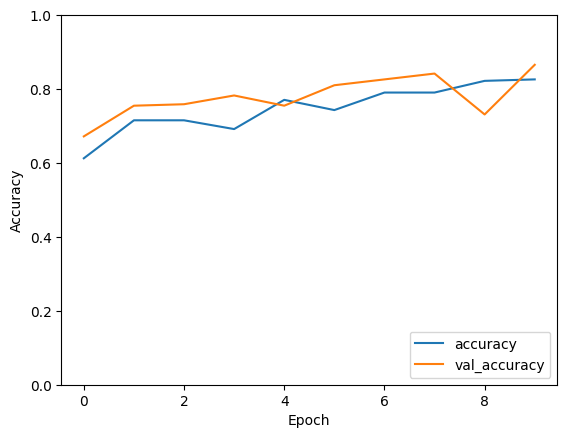

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#Step 8: Making Predictions


1/1 [==============================] - 0s 114ms/step


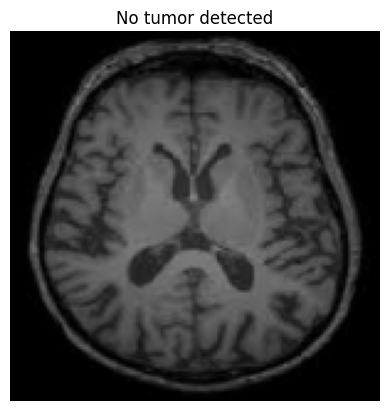

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
def load_and_prep_image(img_path, img_shape=150):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_shape, img_shape))
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1] and convert to float32
    return np.expand_dims(img, axis=0), img  # Return both expanded and original image

def predict_tumor(img_path):
    img_expanded, img = load_and_prep_image(img_path)
    prediction = model.predict(img_expanded)
    if prediction[0] > 0.5:
        return "Tumor detected", img
    else:
        return "No tumor detected", img

# Test the prediction function with a sample image
sample_image_path = '/content/drive/MyDrive/Dataset/test/normal/10 no.jpg'
result, img = predict_tumor(sample_image_path)

# Display the image with the prediction result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(result)
plt.axis('off')
plt.show()



#Explanation
* Setting Up the Environment: Install necessary libraries using pip install.
* Importing Libraries and Loading Data: Import required libraries and load the dataset. Make sure the dataset is structured properly.
* Preprocessing the Data: Use ImageDataGenerator to load and preprocess images for training and testing.
* Building the CNN Model: Define a simple CNN architecture using Keras.
* Compiling the Model: Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric.
* Training the Model: Train the model for a set number of epochs and validate using the test dataset.
* Evaluating the Model: Evaluate the model's performance and visualize the training process.
* Making Predictions: Load a new image, preprocess it, and use the trained model to make predictions.
